## Decision Trees for Classification

## What is a Decision Tree?
A Decision Tree is a flowchart_like structure used for decision making and classification. It splits the dataset into smaller subsets based on feature values. Each node represents a feature, each branc a decision rule and each leaf a class label.

### Advantages:
- Easy to visualize and interpret
- Handles both numerical and categorical data
- No need for data normalization

### Example use case

Predict whether a customer will recharge based on recharge values

In [6]:
pip install pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd

data = pd.read_csv("D:/5059/TrainingDatas/Handbooks/ML/recharge_data.csv")


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

print("Column Names:")
print(data.columns.tolist())
print("\nData shape: ", data.shape)
print("\nSummary of data:")
print(data.info())
print("\n Statistics of data")
print(data.describe())
print("\nChecking for null values:")
print(data.isnull().sum())
print("\nDataset consistency: ")
print(data.dtypes)

data['CustomerType'] = le.fit_transform(data['CustomerType'])
data['Complaints'] = le.fit_transform(data['Complaints'])
data['Recharged'] = le.fit_transform(data['Recharged'])

X = data[['MonthlyUsage', 'CustomerType', 'Complaints']]
y = data['Recharged']
data

Column Names:
['MonthlyUsage', 'CustomerType', 'Complaints', 'Recharged']

Data shape:  (150, 4)

Summary of data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MonthlyUsage  150 non-null    int64 
 1   CustomerType  150 non-null    object
 2   Complaints    150 non-null    object
 3   Recharged     150 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB
None

 Statistics of data
       MonthlyUsage
count      150.0000
mean      1448.6400
std        825.4999
min        135.0000
25%        801.7500
50%       1368.5000
75%       1884.7500
max       2995.0000

Checking for null values:
MonthlyUsage    0
CustomerType    0
Complaints      0
Recharged       0
dtype: int64

Dataset consistency: 
MonthlyUsage     int64
CustomerType    object
Complaints      object
Recharged       object
dtype: object


,MonthlyUsage,CustomerType,Complaints,Recharged
0,2669,1,1,1
1,1151,0,0,1
2,1584,0,1,1
3,2693,1,0,1
4,500,1,1,0
...,...,...,...,...
145,1343,2,1,1
146,1540,2,0,1
147,497,4,1,0
148,1283,0,1,1


# Dataset Specification Sheet

## Dataset Overview

| Field | Details |
|------|--------|
| **Dataset Name** | customer_churn_usage.csv (demo dataset) |
| **Description** | Contains 150 customer records with demographic information, subscription plan types, monthly usage, and churn status. Useful for demonstrating Data Quality checks (completeness, consistency), descriptive statistics, and bias/distribution analysis for churn-related studies. |
| **Features** | Age (int64), Gender (object), PlanType (object), MonthlyUsage (int64), Churn (object) |
| **Target Variable** | Churn (Yes / No) |
| **Number of Rows** | 150 |
| **Null Handling** | No missing values in the dataset |
| **Owner** | Student / Notebook Author |
| **Last Updated** | 2026-01-07 |

---

## Data Structure & Quality Checks

- **Column Names**  
  ```python
  ['Age', 'Gender', 'PlanType', 'MonthlyUsage', 'Churn']


In [14]:
print("Dataset Bias")

print(data['Recharged'].value_counts(normalize=True))

Dataset Bias
Recharged
1    0.7
0    0.3
Name: proportion, dtype: float64


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "gini")
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy:  0.9555555555555556
Confusion matrix: 
 [[12  1]
 [ 1 31]]


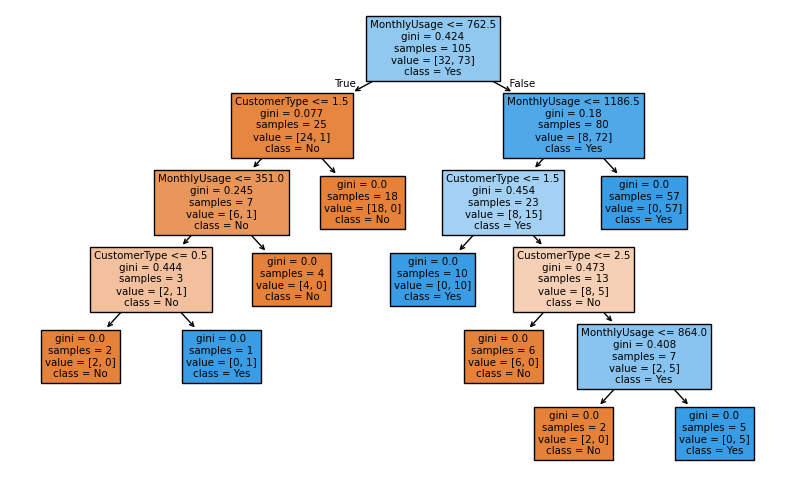

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plot_tree(model, feature_names=['MonthlyUsage', 'CustomerType', 'Complaints'], class_names=['No', 'Yes'], filled = True)
plt.show()

In [45]:
new_data = [[200,2,3]]
print("Recharge Prediction: ", model.predict(new_data))

Recharge Prediction:  [0]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
